<a href="https://colab.research.google.com/github/avilashsrivastava/Bike-Sharing-Demand-Prediction/blob/main/Individual_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Introduction**

<b> “All knowledge - past, present, and future - can be derived from data by a single, universal learning algorithm.”</b> - Pedro Domingos; Pedro is a professor of computer science and engineering at the University of Washington. He is a researcher in machine learning known for Markov logic network enabling uncertain inference.[Source](https://en.wikipedia.org/wiki/Pedro_Domingos)

<b> "Machine Learning"</b>, has become a boon for modern day science as it not only has made scientific experiments and researches easier but with the capability to think, has produced results way beyond human limits. And this is just a childhood  stage, with more advancements in technologies, algorithms, we could not even possibly imagine to what extent future Artificial Intelligence will excell.

But at an early stages of a baby, we as a parent should first try to teach AI to take first steps, and as we know this is just a beginning, we should first teach, how to find similar patterns to identify the world besides him, so that the machine could learn and answer when new questions are asked.

That being said, in this exercise I will try to implement various machine learning algorithms to try and predict a regression problem. Regression in machine learning means, predicting numerical values. I will try my best to provide a fair enough analysis but surely theres always scope of a better version. The contents of the notebook include:

1. <b>Exploratory data analysis:</b> In this section we will take a look at the features we have and by using different visualization techniques, find relationships among them.

2. <b>Data Wrangling</b>: In this section we will try to modify our dataset, handle missing values, outliers, form new columns, convert data types, etc.

3. <b> Splitting data and Standardization</b>: Here we will split out data into train and test sets and apply standardization methods.

4. <b> Fit different models:</b> We will use some ML algorithms such as Linear regression, Decision tree, Random forest etc. and also check the performance using different evaluation metrics. We will also do hyperparameter tuning and implement regularization techniques to improve performance.

5. <b> Model Explainability:</b> In this section we will see what goes on inside the model we built.

6. <b> Conclusion</b>: Finally, we will try to dig insights from our experiment and frame all the observations made during the analysis.

Lets begin!

In [1]:
# importing python libraries that would help us immensely during our endeavour
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor


# to not get tensed over unnecessary warnings we will ignore them
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading the big guy
directory_path="/content/drive/MyDrive/Almabetter/Bike Sharing Demand Prediction - Avilash Srivastava/"  
seoul_df=pd.read_csv(directory_path+"SeoulBikeData.csv",encoding= 'unicode_escape')

# Note: Please change the directory path where the file is stored while running in your system.

Now that we have loaded our data, let us have an intial look at it.

In [4]:
# looking for top 5 rows
seoul_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#looking for bottom 5 rows
seoul_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# finding the columns of the datset
print('The columns in the dataset are:','\n','\n',seoul_df.columns.to_list())

The columns in the dataset are: 
 
 ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [7]:
# finding the types of data in each column
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

The dataset has 3 types of data namely: Integer, float, strings/objects

In [8]:
# finding total no of rows in dataset
print("The no of rows in the dataset is: ",len(seoul_df))

The no of rows in the dataset is:  8760


### Understanding problem statement

Great! Now that we have seen what the data looks like, its time to understand what these features/variables/columns are and try to understand the problem statement given above.

1. We have a variable 'date' which tells us the day on which some bikes were rented

2. We have a variable 'hour' which tells which hour of the day the bikes were rented.

3. We have some numerical type variables such as temperature, humidity, wind, visiblity, dew point temp, solar radiation, rainfall, snowfall which tells the environment conditions at that particular hour of the day.

4. We have some categorical variable such as seasons, is it a holiday and is it a fuctioning day or not.

5. And finally we have 'rented bike count' variable which we need to predict for new observations given the other variables.

Bike rentals have became a popular service in recent years and it seems people are using it more offen. With relatively cheaper rates and ease of pick up and drop at own convenience is what making this business excell. Mostly used by people having no personal vehicles and also to avoid congested public transport which follows its own time.

Therefore, the business to strive and profit more, it has to be always ready and supply no. of bikes at different locations, to fulfil the demand. A pre planned set of bike count values can therefore, be a handy solution to meet all demands.



Now that we know what we need to do in this exercise. Let us ask ourselves some questions:

1. Are the numerical variables which can be be segmented into 'Environment conditions', have any impact on our dependent variable? (dependent variable, in short - dv, in this case is our "rental bikes count" which we need to predict).

  Why do we need them in first place?

   Do these variable have any correlation with each other and also with   dependent variable?

   Do these variable follow similar kind of distribution?

2. Does the hour of the day reflects changes in bike demand?

3. Does demand gets affected during different seasons, holidays etc?

Let us now dwelve deeper and try to find those answers. Finally, we will fit various models that will predict bikes count given new observation.

Lets do it!

# **1. Exploratory Data Analysis**

Exploratory data analysis aka EDA may sound fancy but is one of the most important step before we build a model. It tells us everything about the variables, their nature, structure, distribution, effects, importance, relationship with other variables and much more. An elegant EDA of the data helps to identify hidden patterns and find the driving factors who influence the dependent variable. Furthermore, it helps us to check on various assumptions that various models such as Linear regression demands. This is all done by using different visualization techniques such as bar graphs, histograms, boxplots, heatmaps etc.

Lets dig deeper in analysing our first variable i.e., dependent variable and later we will analyse other variables.

### Univariate analysis

In this section we will deal with each variables independently. Its important to note that some datasets concerning different type of problem can have a large number of variables/columns. So it might not be possible to conduct univariate analysis on all of them. There are ways in which we can skip the step and continue with multivariate analysis. However, in this problem we dont have much columns so we can proceed analysing each variable.

<b> 1. "Rental Bike Count" - Dependent variable(dv)

As the most important variable in the data, let us try to find the descriptive stats of data and its distribution.

In [9]:
# descriptive stats of dv
seoul_df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

It looks like their might be some outliers in our variable if we observe the min, max, 25% and 75% values. 

Text(0.5, 1.0, "Boxplot of 'rented bike count'")

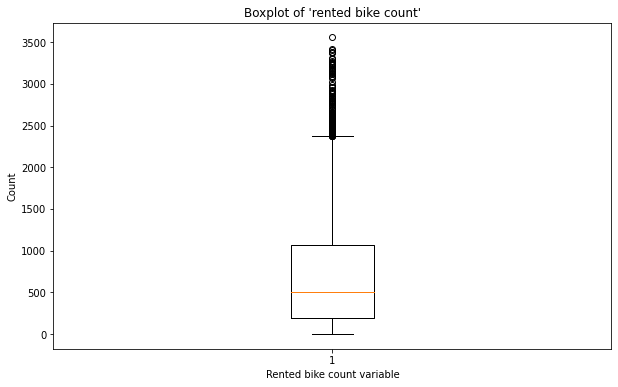

In [10]:
# checking outliers using box plot
plt.figure(figsize=(10,6))
plt.boxplot(seoul_df['Rented Bike Count'])
plt.xlabel('Rented bike count variable')
plt.ylabel('Count')
plt.title("Boxplot of 'rented bike count'")

Looks like we have a lot of outliers on the maximum side(above ~2500). We will deal with them later in this analysis. Let us now check the distribution of our variable.

Skewness: 1.153428
Kurtosis: 0.853387


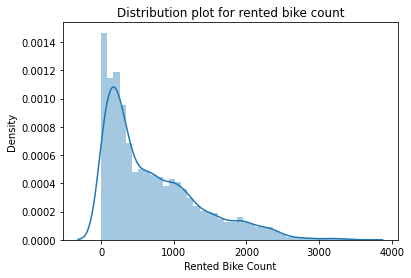

In [11]:
# checking the distribution of dv
sns.distplot(seoul_df['Rented Bike Count'])
plt.title('Distribution plot for rented bike count')

#skewness and kurtosis
print("Skewness: %f" % seoul_df['Rented Bike Count'].skew())
print("Kurtosis: %f" % seoul_df['Rented Bike Count'].kurt())

Looks like our variable is positively skewed having value 1.152 and has peakedness of 0.853. Let's take square root of our dv( as it is moderately skewed) and draw the plot. It will give us more clarification about data and we can visualize in a better way

Text(0.5, 1.0, 'Sqrt transformed rented bike count')

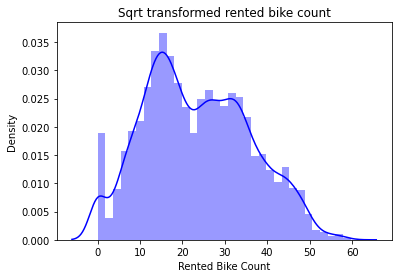

In [12]:
# checking the distribution of dv after transformation
sns.distplot(np.sqrt(seoul_df['Rented Bike Count']),color='b')
plt.xlabel('Rented Bike Count')
plt.title('Sqrt transformed rented bike count')

Beautiful! After applying a transformation we can see that our dv is somewhat resembling a normal distribution. Now we dont have to take care of the outliers as transformation has done the job for us. 

Note: One should proceed with caution when considering to remove observations from the data. In many cases, there is a valid reason for these observations to exist.

<b> 2. Functioning day</b>


It is a categorical variable with two values 'Yes' And 'No' as shown below. It tells us that whether the day was a normal business day for a company or not.

In [13]:
# finding the categories of this variable
print('The categories in functioning day are: ',seoul_df['Functioning Day'].unique().tolist())

The categories in functioning day are:  ['Yes', 'No']


Let us find the count of each one of these category and visualize them.

In [14]:
# finding the count of Yes and No
seoul_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

Text(0.5, 1.0, 'Countplot for functioning day variable')

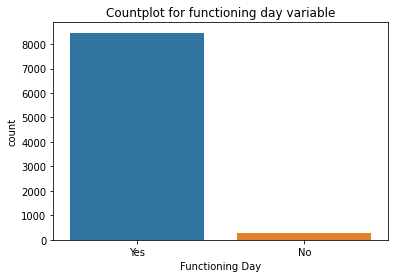

In [15]:
# visualizing the counts
sns.countplot(seoul_df['Functioning Day'])
plt.title('Countplot for functioning day variable')

It looks like the majority class is Yes for this variable. And almost 3% No. It would be reasonable enough to drop this column during our model fitting. 

<b> 3. Holiday

It is a categorical variable having two classes 'No holiday' and 'Holiday'. Can be an important variable because there would be more demand during holidays as people like to tour during holidays. Lets see!

In [16]:
# finding the categories of this variable
print('The categories in holiday are: ',seoul_df['Holiday'].unique().tolist())

The categories in holiday are:  ['No Holiday', 'Holiday']


Let us find the count of each one of these category and visualize them.

In [17]:
# finding the count of holiday and No holiday
seoul_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Text(0.5, 1.0, 'Countplot for holiday variable')

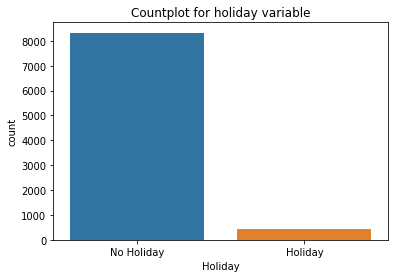

In [18]:
# visualizing the counts
sns.countplot(seoul_df['Holiday'])
plt.title('Countplot for holiday variable')

Again we have majority of one class here and other class being only around 5%. Hence we will drop this column during fitting Linear regression.

Question: But why we should drop the column?

Thats because we have around 95 percent belonging to a single class. Thus, if we get a new set of observations to predict, there is 95% probability that it will belong to the majority class. If you want to keep both classes for modelling, it would be better to get more data and look for better proportions of the classes, that would have an impact on our dv.

<b> 4. Seasons

It is a categorical variable having categories Winter, Spring, Summer and Autumn as shown below. Let us also find the counts of each categories.

In [19]:
# finding the categories of season variable
print('The categories in seasons are: ',seoul_df['Seasons'].unique().tolist())

The categories in seasons are:  ['Winter', 'Spring', 'Summer', 'Autumn']


In [20]:
# finding the count of each category of seasons.
seoul_df['Seasons'].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

Text(0.5, 1.0, 'Counts of each season')

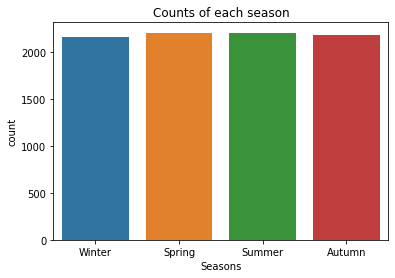

In [21]:
# visualize the counts
sns.countplot(seoul_df['Seasons'])
plt.title('Counts of each season')

Cleary we have an equal proportions of each of the seasons. We will see if this has any effect on our dv in our multivariate analysis and if it does, will surely encode this in our prediction model.

<b> 5. Date

It is a numerical variable which tells us the date of bookings. Let us see the count of how many days we have. For that we will try to separate the date column into days, months and years.

In [22]:
# making a fuction to separate date
def date_seperator_year(date_column):
  return date_column[6:]
def date_seperator_month(date_column):
  return date_column[3:5]
def date_seperator_day(date_column):
  return date_column[:2]

In [23]:
# creating a copy of our dataframe to apply changes.
seoul_df_copy=seoul_df.copy()

In [24]:
# making new columns
seoul_df_copy['Day']=seoul_df_copy['Date'].apply(date_seperator_day)
seoul_df_copy['Month']=seoul_df_copy['Date'].apply(date_seperator_month)
seoul_df_copy['Year']=seoul_df_copy['Date'].apply(date_seperator_year)

In [25]:
# checking the changes
seoul_df_copy.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017


Great! Three more columns have been added. Now let us see the no of years, month we have

In [26]:
# checking no of years
seoul_df_copy['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

Text(0.5, 1.0, 'Count of Years')

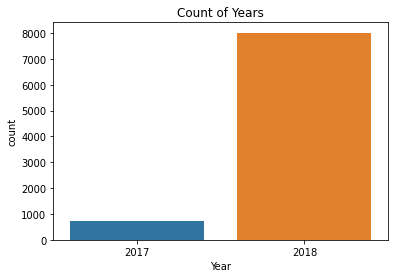

In [27]:
# visualizing it
sns.countplot(seoul_df_copy['Year'])
plt.title('Count of Years')

Looks like we have most of the data from year 2018. Again we will drop this column in our analysis. Let us now have a look at months.

Text(0.5, 1.0, 'Count of each months')

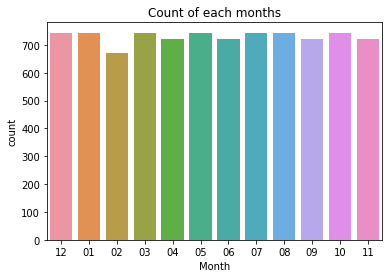

In [28]:
# finding the counts of month
sns.countplot(seoul_df_copy['Month'])
plt.title('Count of each months')

We have almost equal no. of records for each month. We will keep this column in our analysis for now. Lets see the days.

Text(0.5, 1.0, 'Count of each day')

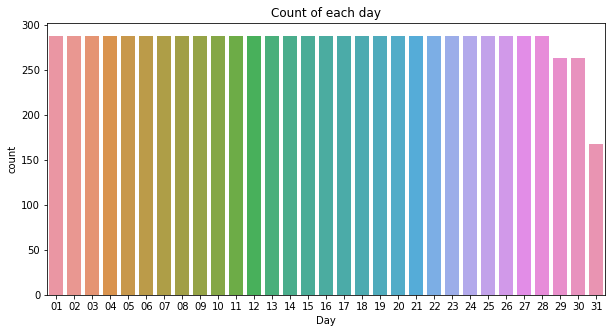

In [29]:
# finding the counts of days
plt.figure(figsize=(10,5))
sns.countplot(seoul_df_copy['Day'])
plt.title('Count of each day')

Looks like we have equal no. of observations for each with little less observations for last days of the months.

Now, let us analyse the numerical variables using boxplot. We will run a for loop to fasten our analysis.

<b> 6. All numerical variables

In [30]:
# first let us find the descriptive stats of our numerical variables
seoul_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Hmmm.. Looking at the descriptions we can see last three colums, rainfall, snowfall, solar radiation have mostly 0 values. Let us confirm using box plot and distplots.

In [31]:
# creating a list of numerical variable
list_of_nv=['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

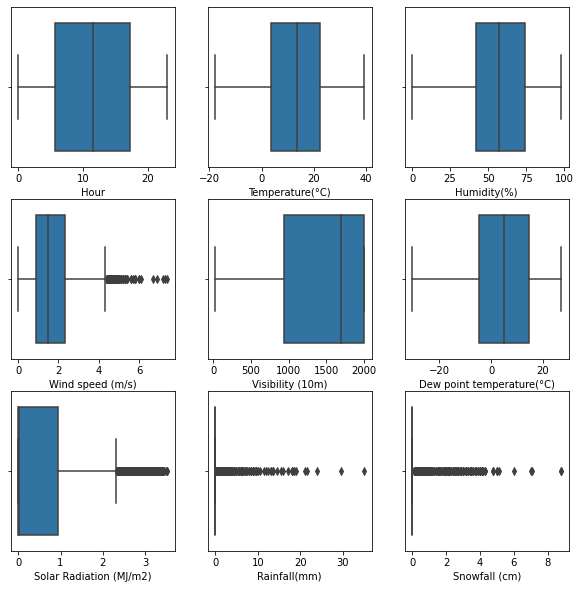

In [32]:
# running a for loop over each of the variables
plt.figure(figsize=(10,10))
for index,item in enumerate(list_of_nv):
  plt.subplot(3,3,index+1)
  sns.boxplot(seoul_df[item])

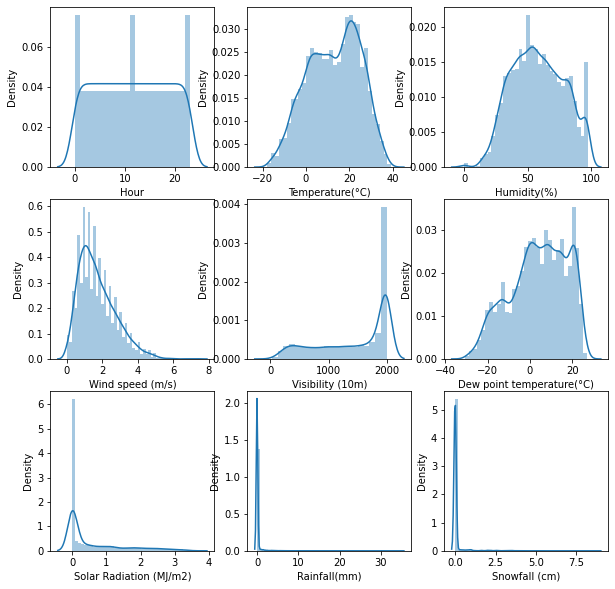

In [33]:
# checking the distribution
plt.figure(figsize=(10,10))
for index,item in enumerate(list_of_nv):
  plt.subplot(3,3,index+1)
  sns.distplot(seoul_df[item])

Awesome! Looks like we dont have much outliers in our numerical variables. Also variable such as rainfall and snowfall have almost all zeroes. There are also variables such as visiblity and solar radiation which as skewed. We will handle them later in the analysis.

<b> Observations from univariate analysis</b>

1. Our dv was slightly positively skewed. We applied square root transformation to make it somewhat normally distributed. Thus handling the outliers as well.

2. Variables such as functioning day, holiday, year had majority of one class. We decided to drop these columns.

3. Some numerical variables had maximum 0 values such as snowfall and rainfall. 

### Multivariate Analysis

Now that we went through each of the variables independently, let us now examine the relationship of each variable with our dependent variable.
First let us find the correlation of each variables. For this, first we need to change the data type of the new columns we formed earlier.

In [34]:
# changing the data types of day and month column 
seoul_df_copy['Day']=seoul_df_copy['Day'].astype('int64')
seoul_df_copy['Month']=seoul_df_copy['Month'].astype('int64')

In [35]:
# checking our conversion
print('The type of 1st row of day column is:\n',type(seoul_df_copy['Day'][1]))

The type of 1st row of day column is:
 <class 'numpy.int64'>


Text(0.5, 1.0, 'Heatmap')

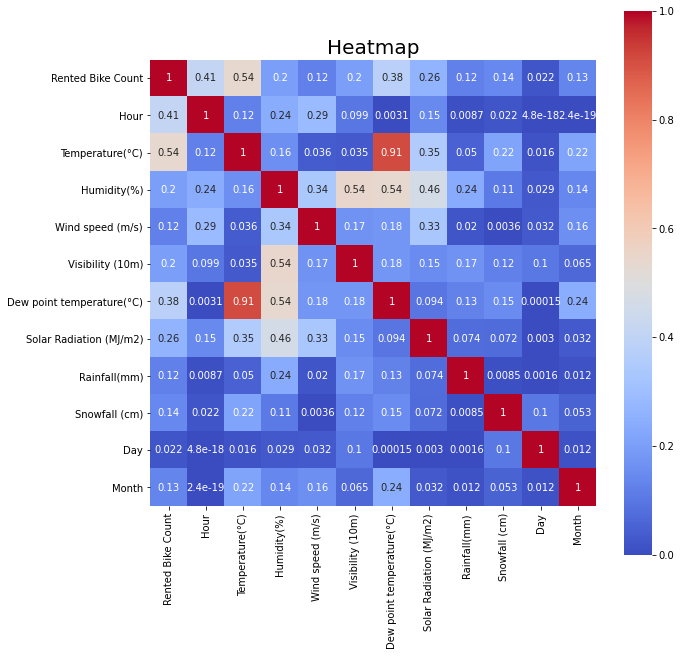

In [36]:
# finding the correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(abs(seoul_df_copy.corr()),cmap='coolwarm', annot=True, square=True)
plt.title('Heatmap',fontsize=(20))

Heatmap is a beautiful representation that tells us the correlation between each features in our dataset. Also it helps us to identify multicollinearity which are one of the assumptions we need to take care of while using Linear regression. Looking at the heatmap above we can observe:

1. There is not much correlation between most of the variables.

2. We can see heavy correlation in two variables i.e., Dew point temperature and Temperature.

3. One important thing to note here is, while doing linear regression one assumption it demands is that the independent variables should show some linear relation with our dependent variable but here we see that there is very less correlation with our dv, rented bike count. In cases such as these, Linear regression might not show good results.

Let us now find the variation inflation factor(VIF) for these variables that will give us a clear picture of multicollinearity.

In [37]:
# Defining a function to calculate VIF
def calc_vif(X):
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [38]:
# calculating vif
calc_vif(seoul_df_copy[[i for i in seoul_df_copy.describe().columns if i not in ['Rented Bike']]])

,variables,VIF
0,Rented Bike Count,4.143377
1,Hour,5.046304
2,Temperature(°C),41.066993
3,Humidity(%),8.552434
4,Wind speed (m/s),4.882107
5,Visibility (10m),9.493999
6,Dew point temperature(°C),19.974876
7,Solar Radiation (MJ/m2),2.932098
8,Rainfall(mm),1.104618
9,Snowfall (cm),1.144220


Here we can observe there is high vif for temperature and dew point temperature(41 and 19 respectively) as seen earlier from the heatmap that they were highly correlated. Our goal now becomes to bring those no. down to less than 10. Let us try by removing the variable dew point temperature. 

In [39]:
# calculating vif
calc_vif(seoul_df_copy[[i for i in seoul_df_copy.describe().columns if i not in ['Rented Bike','Dew point temperature(°C)']]])

,variables,VIF
0,Rented Bike Count,4.110260
1,Hour,4.708249
2,Temperature(°C),4.498110
3,Humidity(%),7.121979
4,Wind speed (m/s),4.675694
5,Visibility (10m),5.555559
6,Solar Radiation (MJ/m2),2.286121
7,Rainfall(mm),1.104021
8,Snowfall (cm),1.139761
9,Day,3.786169


Great we have now brought all the vif values around 5, thus handling multicollinearity. Let us now find the relationship of all variables with our dv.

<b> 1. Seasons(categorical variable) 

Text(0, 0.5, 'rented bike count mean')

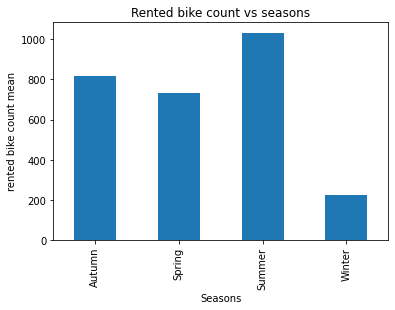

In [40]:
# checking the mean rented bike count in each seasons.
seoul_df_copy.groupby(['Seasons'])['Rented Bike Count'].mean().plot(kind='bar')
plt.title('Rented bike count vs seasons')
plt.ylabel('rented bike count mean')

Text(0.5, 1.0, 'Rented bike count vs seasons')

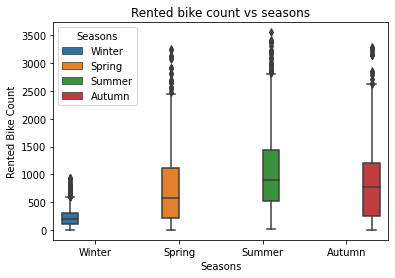

In [41]:
# visualize using boxplot
sns.boxplot(x=seoul_df_copy['Seasons'],y=seoul_df_copy['Rented Bike Count'],hue=seoul_df_copy['Seasons'])
plt.title('Rented bike count vs seasons')

It looks like for summer the bikes demand is high and for winters the demand is less. Reasonable to include this variable in our analysis. We will hot encode them later. Let us have a look at scatter plots of each numerical variable.

<b> 2. All numerical variables

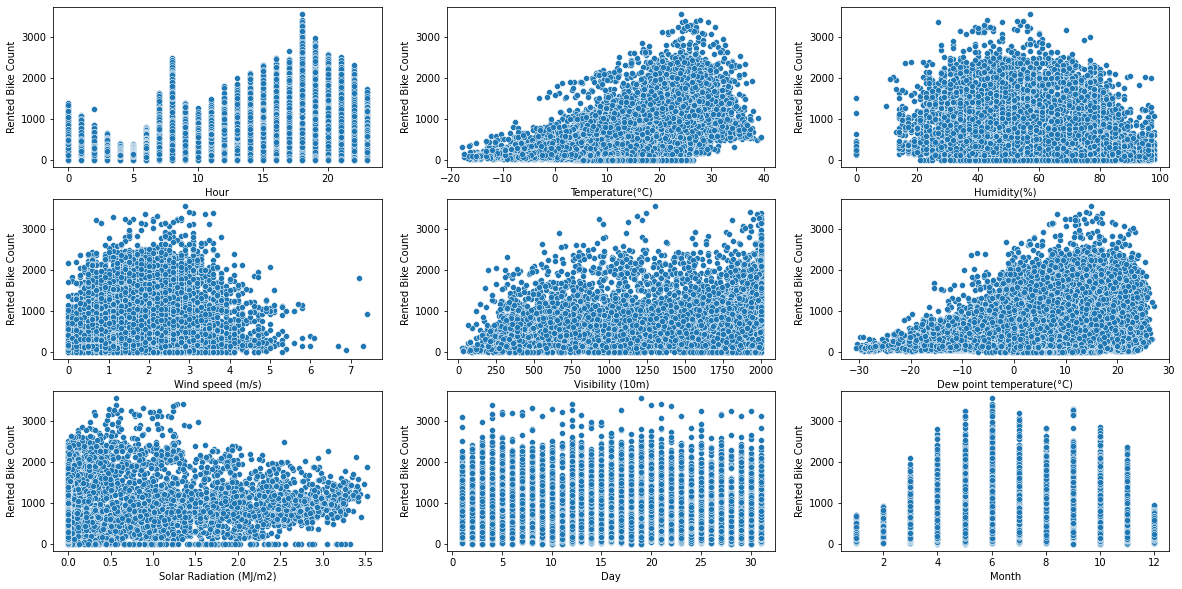

In [42]:
# creating a list of nv we need
list2=[i for i in seoul_df_copy.describe().columns.to_list() if i not in ['Snowfall (cm)','Rainfall(mm)','Rented Bike Count']]

# running a for loop over list2
plt.figure(figsize=(20,10))
for index,i in enumerate(list2):
  plt.subplot(3,3,index+1)
  sns.scatterplot(x=seoul_df_copy[i],y=seoul_df_copy['Rented Bike Count'])




Observations drawn from the scatter plots are as follows:
1. Demand for bikes is higher during morning hours and hours between 15 and 20. This maybe due to normal environment conditions when there is less heat and also starting and ending office hours.

2. Demand is high when temperatures are high, visibility is high.

3. Demand is high when windspeed is less and solar radiation is less.

3. Demand is high during medium humidity.

4. Demand is almost the same for each day.

5. Demand is high during mid term of a year.

It seems there is some relationship between our numerical variables and dependent variable as seen above. Hence we can proceed further with our Linear regression. 

### Conclusions from our EDA

Now that we have analysed our data lets dig insights drawn from our EDA analysis.

1. 'Rented bike count' our dv was slightly positively skewed. We applied square root transformation to bring it to somewhat normal distribution, thus handling the outliers as well.

2. Categorical variables such as 'functioning day', 'holiday' had majority of one class, so we decided to drop them.

2. Almost all the observations are from year 2018.

3. Numerical variables such as Rainfall and Snowfall has mostly 0 values so we decided to drop them.

4. Variable such as temperature and dew point temperature were highly correlated so we decided to drop dew point temperature.

Having done our eda will help our model to:

a. Perform better with predictions.

b. Run faster.

# **2. Data Wrangling**

Data wrangling is a process in which we try to clean our data and make changes into our dataset such as unification, changing datatypes, encoding, removing columns etc. In this section let us try to clean our data and modify it according to our analysis from EDA.

### Missing Values

It is always advisable to tackle any missing values present in our dataset because these values can have drastic impact on our results. There are many ways to tackle missing values such as removing them, replacing with mean or median values etc. Let us have a look, if our dataset has any missing values.


In [43]:
# checking for missing values
print('The no. of missing values in each variable:\n',seoul_df_copy.isna().sum())

The no. of missing values in each variable:
 Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
dtype: int64


Great! It looks like we dont have any missing values in our dataset. We can proceed further.

### Outliers

Outliers are those numbers which donot follow a normal range of distribution for a given sequence of numbers. Having outliers can result in poor performance of the model as it can make a model more baised towards those extreme no. Also when trying to test new observations there is low probability that the no will be at extreme.

Let us have a look, if there are any outliers in our data, using boxplot.

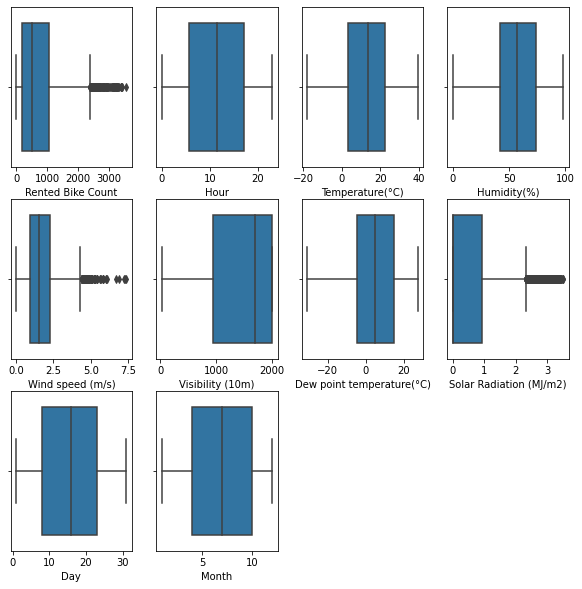

In [44]:
# looking for outliers using box plot
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in seoul_df_copy.describe().columns.to_list() if i not in ['Rainfall(mm)','Snowfall (cm)']]):
  plt.subplot(3,4,index+1)
  sns.boxplot(seoul_df_copy[item])

Looks like we dont have outliers in most of the varaibles except:

1. We have handled ouliers in our dv 'Rented bike count' by applying transformation.

2. Wind speed and solar radiation have outliers but as they are not that far from the maximum values we will keep them.

### Removing columns

Now its time to remove the columns which we think is not necessary from our analysis above.

In [45]:
# removing columns
seoul_df_copy.drop(columns=['Date','Dew point temperature(°C)','Rainfall(mm)','Snowfall (cm)','Holiday','Functioning Day','Year'],inplace=True)

In [46]:
# checking our dataframe
seoul_df_copy.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Day,Month
0,254,0,-5.2,37,2.2,2000,0.0,Winter,1,12
1,204,1,-5.5,38,0.8,2000,0.0,Winter,1,12


### Encoding 


This process refers to changing our categorical variable into numerical variable by changing classes into 0 or 1. This is important because machine learning models cannot process categorical variables and hence they must be converted. We will use a technique called One hot encoding to convert from categorical to numerical.

In [47]:
# One hot encoding the season variable
seoul_df_copy=pd.get_dummies(seoul_df_copy,columns=['Seasons'])

In [48]:
# checking the changes
seoul_df_copy.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,1,12,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,1,12,0,0,0,1


Great! Now our dataframe is ready for the regression machine learning algorithms. There are many algorithms to predict regression tasks. Some of them are Linear regression, Random Forest, XGBoost, SVM etc. We will have a look at those in detail.

# **3. Train-Test split and Standardization**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [49]:
# let us have a look at our independent features
features=seoul_df_copy.columns.tolist()
features.pop(0)
print('The independent features are:\n',features)

The independent features are:
 ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Day', 'Month', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']


In [50]:
# creating a variable to store independent features and dependent feature
X=seoul_df_copy[features]
y=seoul_df_copy['Rented Bike Count']

In [51]:
# transforming y
y=np.sqrt(y)

In [52]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # random_state=0 to ensure same observations in each set everytime we run 

In [53]:
# checking the shapes
print(f'The shapes of train and test set for independent variables are: X_train={X_train.shape}, X_test={X_test.shape}')
print(f'The shapes of train and test set for dependent variables are: y_train={y_train.shape}, y_test={y_test.shape}')

The shapes of train and test set for independent variables are: X_train=(7008, 12), X_test=(1752, 12)
The shapes of train and test set for dependent variables are: y_train=(7008,), y_test=(1752,)


Great! Now that we have splitted our data other important step one should perform, is to standardize or normalize the independent variables. This is to ensure a consistent range of values are fed into the model. Also it make the predictors mean 0 so it is easy to find the intercept. We will be using StandardScaler to standardize our data. It is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1.

In [54]:
# before transformation
X_train.values

array([[15. ,  8.2, 62. , ...,  0. ,  0. ,  1. ],
       [18. , 28.4, 57. , ...,  0. ,  1. ,  0. ],
       [11. , 29.9, 57. , ...,  0. ,  1. ,  0. ],
       ...,
       [11. , 25.5, 57. , ...,  0. ,  1. ,  0. ],
       [ 0. ,  8.3, 59. , ...,  1. ,  0. ,  0. ],
       [20. ,  7.1, 83. , ...,  1. ,  0. ,  0. ]])

In [55]:
# standardizing the independent variables
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [56]:
# after transformation
X_train

array([[ 0.50774916, -0.38874606,  0.18996015, ..., -0.57866842,
        -0.57910781,  1.7507042 ],
       [ 0.9408263 ,  1.29850393, -0.05608294, ..., -0.57866842,
         1.72679419, -0.57119872],
       [-0.06968702,  1.42379477, -0.05608294, ..., -0.57866842,
         1.72679419, -0.57119872],
       ...,
       [-0.06968702,  1.05627497, -0.05608294, ..., -0.57866842,
         1.72679419, -0.57119872],
       [-1.65763652, -0.38039334,  0.0423343 , ...,  1.72810536,
        -0.57910781, -0.57119872],
       [ 1.22954439, -0.48062601,  1.22334111, ...,  1.72810536,
        -0.57910781, -0.57119872]])

Great! Now we are ready to fit our models. Lets rock!

# **4. Fitting Models**

In this section we will be feeding our dataset into various machine learning algorithms to predict our dv 'Rented Bike Count'. The steps we will be performing are as follows:

1. Initial fitting and training the model.

2. Evaluating model performance using different evaluation metrics. This will tell us how good our model is performing.

3. Try regularization techniques if the model is overfitting.

4. Try hyperparameter tuning using Gridsearch and random search, to get the best parameters for our model and then use those to get a better version of our model.

5. Implement shap techniques to analyse the importance of features.

### **1. Linear Regression**

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost fuction is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.


### Initial fitting


In [57]:
# making a Linear regression model
linear_regressor=LinearRegression()


In [58]:
#fitting the data
linear_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# predicting for both train and test
y_pred_train1=linear_regressor.predict(X_train)
y_pred_test1=linear_regressor.predict(X_test)

In [60]:
# checking the intercept
linear_regressor.intercept_

23.55011559839751

In [61]:
# checking the coefficients
linear_regressor.coef_

array([ 3.48430312,  4.6549875 , -3.7173102 , -0.04783542,  0.12539003,
       -0.62867258,  0.30942533,  0.53491251,  0.35267114,  0.56008042,
        1.15858313, -2.08589619])

These coefficients are the values of betas. They tell us which feature is affecting our dv. The numbers depict how much change the dv has when each variables changes.

### Regresion evaluation metrics

Here are some common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
 
**Mean Squared Error (MSE)** is the mean of the squared errors
 
**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

**R2 Score** is the score which tells us how much variance our model is able to capture from the data. 
 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
<br>MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [62]:
# finding each of the metrics for training set
print('The evaluation metric values for training set - Linear regression:')
print('The MAE of training set = ',mean_absolute_error(np.power(y_train,2),np.power(y_pred_train1,2)))
print('The MSE of training set = ',mean_squared_error(np.power(y_train,2),np.power(y_pred_train1,2)))
print('The RMSE of training set = ',np.sqrt(mean_squared_error(np.power(y_train,2),np.power(y_pred_train1,2))))
print('The R2_score of training set = ',r2_score(np.power(y_train,2),np.power(y_pred_train1,2)))
print('The Adjusted R2_score of training set = ',1-(1-r2_score(np.power(y_train,2),np.power(y_pred_train1,2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

The evaluation metric values for training set - Linear regression:
The MAE of training set =  319.13187034777394
The MSE of training set =  215574.80572996737
The RMSE of training set =  464.3003400063017
The R2_score of training set =  0.4808466487972598
The Adjusted R2_score of training set =  0.47995603547139376


Looks like our r2 score value is 0.48 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [63]:
# creating a data frame to store metrics values
dict1={'Model':'Linear regression',
       'MAE':round(mean_absolute_error(np.power(y_train,2),np.power(y_pred_train1,2)),3),
       'MSE':round(mean_squared_error(np.power(y_train,2),np.power(y_pred_train1,2)),3),
       'RMSE':round(np.sqrt(mean_squared_error(np.power(y_train,2),np.power(y_pred_train1,2))),3),
       'R2_score':round(r2_score(np.power(y_train,2),np.power(y_pred_train1,2)),3),
       'Adjusted R2':round(1-(1-r2_score(np.power(y_train,2),np.power(y_pred_train1,2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),2),
       'Comments':'Possible underfitting'}
training_df=pd.DataFrame(dict1,index=[1])

In [64]:
# finding each metrics for test set
print('The evaluation metric values for test set - Linear regression:')
print('The MAE of test set = ',mean_absolute_error(np.power(y_test,2),np.power(y_pred_test1,2)))
print('The MSE of test set = ',mean_squared_error(np.power(y_test,2),np.power(y_pred_test1,2)))
print('The RMSE of test set = ',np.sqrt(mean_squared_error(np.power(y_test,2),np.power(y_pred_test1,2))))
print('The R2_score of test set = ',r2_score(np.power(y_test,2),np.power(y_pred_test1,2)))
print('The Adjusted R2_score of test set = ',1-(1-r2_score(np.power(y_test,2),np.power(y_pred_test1,2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

The evaluation metric values for test set - Linear regression:
The MAE of test set =  323.5701220367176
The MSE of test set =  219948.68536075923
The RMSE of test set =  468.9868712029786
The R2_score of test set =  0.47446400402651934
The Adjusted R2_score of test set =  0.4708375336690255


The r2_score for the test set is 0.47. This means our linear model is not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).




Text(0.5, 0, 'Actual Values')

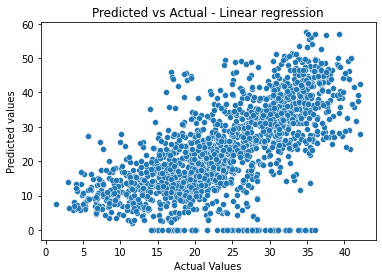

In [65]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test1,y=y_test)
plt.title('Predicted vs Actual - Linear regression')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

As we can see from the figure above that predicted and actual values have a lot of variance.

Text(0.5, 1.0, 'Residual Analysis - Linear regression')

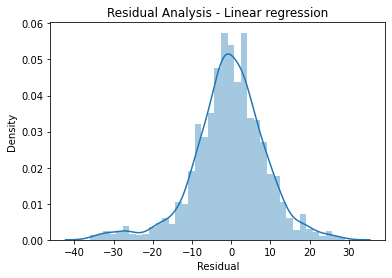

In [66]:
# residual analysis
sns.distplot(((y_test)- (y_pred_test1)))
plt.xlabel('Residual')
plt.title('Residual Analysis - Linear regression')

Text(0.5, 1.0, 'Predicted values vs residuals - Heteroscedasticity(LR)')

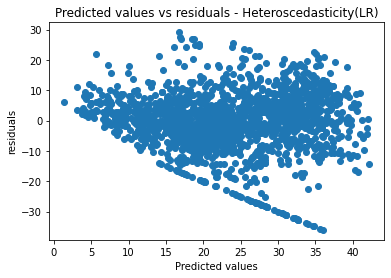

In [67]:
# checking for heteroscedasticity
plt.scatter(y_pred_test1,y_test-y_pred_test1)
plt.xlabel('Predicted values')
plt.ylabel('residuals')
plt.title('Predicted values vs residuals - Heteroscedasticity(LR)')

It looks like our model has heteroscedasticity. One of the assumptions of linear regression is that there should be homoscedasticity i.e., constant variance throughout. Some ways in which we can treat homoscedasticity are:

1. Transform the dependent variable

2. Redefine the dependent variable

3. Use weighted regression

We can go back and try fixing our analysis from first. But do we have another option? Yes! ofcourse, we can try implementing different models.

Question: Why cant we try and fix our analysis so that this model performs better?

Thats because, we have n no of options. Maybe this model was not built for this type of data. It is always a thing to note that not every type of data can be fitted over a single model and perform miracles. There are some data like time series where linear regression would mostly fail.

In [68]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression',
       'MAE':round(mean_absolute_error(np.power(y_test,2),np.power(y_pred_test1,2)),3),
       'MSE':round(mean_squared_error(np.power(y_test,2),np.power(y_pred_test1,2)),3),
       'RMSE':round(np.sqrt(mean_squared_error(np.power(y_test,2),np.power(y_pred_test1,2))),3),
       'R2_score':round(r2_score(np.power(y_test,2),np.power(y_pred_test1,2)),3),
       'Adjusted R2':round(1-(1-r2_score(np.power(y_test,2),np.power(y_pred_test1,2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2),
       'Comments':'Possible underfitting'}
test_df=pd.DataFrame(dict2,index=[1])

### **2. Random Forest Regressor**

A Random forest is an ensemble modle that consists of many decision trees. Each tree in a random forest is trained on the subset of data provided. The subset is obtained both with respect to rows and columns. Predictions are made by averaging the predictions of each decision tree. In the realm of machine learning, the random forest regression algorithm can be more suitable for regression problems than other common and popular algorithms.

To implement the random forest regressor, we are going to use scikit-learn, and we will import our RandomForestRegressor from sklearn.ensemble.

### Initial fitting

In [69]:
# implementing random forest
random_regressor=RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
# predicting for both train and test
y_pred_train2=random_regressor.predict(X_train)
y_pred_test2=random_regressor.predict(X_test)

In [71]:
# evalutaing the model using metrics
# finding each of the metrics for training set
print('The evaluation metric values for training set - Random forest:')
print('The MAE of training set = ',mean_absolute_error(np.power(y_train,2),np.power(y_pred_train2,2)))
print('The MSE of training set = ',mean_squared_error(np.power(y_train,2),np.power(y_pred_train2,2)))
print('The RMSE of training set = ',np.sqrt(mean_squared_error(np.power(y_train,2),np.power(y_pred_train2,2))))
print('The R2_score of training set = ',r2_score(np.power(y_train,2),np.power(y_pred_train2,2)))
print('The Adjusted R2_score of training set = ',1-(1-r2_score(np.power(y_train,2),np.power(y_pred_train2,2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

The evaluation metric values for training set - Random forest:
The MAE of training set =  59.736064260702186
The MSE of training set =  10809.661152323308
The RMSE of training set =  103.96952030438203
The R2_score of training set =  0.9739678679352528
The Adjusted R2_score of training set =  0.9739232095242768


In [72]:
# finding each metrics for test set
print('The evaluation metric values for test set - Random forest:')
print('The MAE of test set = ',mean_absolute_error(np.power(y_test,2),np.power(y_pred_test2,2)))
print('The MSE of test set = ',mean_squared_error(np.power(y_test,2),np.power(y_pred_test2,2)))
print('The RMSE of test set = ',np.sqrt(mean_squared_error(np.power(y_test,2),np.power(y_pred_test2,2))))
print('The Adjusted R2_score of test set = ',1-(1-r2_score(np.power(y_test,2),np.power(y_pred_test2,2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

The evaluation metric values for test set - Random forest:
The MAE of test set =  171.94730050000206
The MSE of test set =  88456.9434373022
The RMSE of test set =  297.41712028278096
The Adjusted R2_score of test set =  0.7871862963099423


We have r2_score for training set = 0.97

We have r2_score for test set = 0.79

Clearly we can see the model is performing well on the training set, but when it comes to test on unseen data, it performs not that good.

This is an obvious case of "overfitting" where the model has captured even the extra noise in the data. There are some parameters of random forest that can be tuned for the model’s better performance.

1. n_estimators: The more trees, the less likely the algorithm is to overfit. So try increasing this parameter. The lower this number, the closer the model is to a decision tree, with a restricted feature set.

2. max_features: You should try reducing this number. This defines how many features each tree is randomly assigned. 

3. max_depth: This parameter will reduce the complexity of the learned models, lowering over fitting risk. 

4. min_samples_leaf: Try setting these values greater than one. This has a similar effect to the max_depth parameter, it means the branch will stop splitting once the leaves have that number of samples each.

In [73]:
# storing metric values in our train df
dict1={'Model':'Random Forest - Before hyperparameter tuning',
       'MAE':round(mean_absolute_error(np.power(y_train,2),np.power(y_pred_train2,2)),3),
       'MSE':round(mean_squared_error(np.power(y_train,2),np.power(y_pred_train2,2)),3),
       'RMSE':round(np.sqrt(mean_squared_error(np.power(y_train,2),np.power(y_pred_train2,2))),3),
       'R2_score':round(r2_score(np.power(y_train,2),np.power(y_pred_train2,2)),3),
       'Adjusted R2':round(1-(1-r2_score(np.power(y_train,2),np.power(y_pred_train2,2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),2),
       'Comments':'Possible overfitting'}
training_df=training_df.append(dict1,ignore_index=True)

In [74]:
# storing metric values in test df
dict2={'Model':'Random Forest - Before hyperparameter tuning',
       'MAE':round(mean_absolute_error(np.power(y_test,2),np.power(y_pred_test2,2)),3),
       'MSE':round(mean_squared_error(np.power(y_test,2),np.power(y_pred_test2,2)),3),
       'RMSE':round(np.sqrt(mean_squared_error(np.power(y_test,2),np.power(y_pred_test2,2))),3),
       'R2_score':round(r2_score(np.power(y_test,2),np.power(y_pred_test2,2)),3),
       'Adjusted R2':round(1-(1-r2_score(np.power(y_test,2),np.power(y_pred_test2,2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2),
       'Comments':'Possible overfitting'}
test_df=test_df.append(dict2,ignore_index=True)

### Hyperparameter tuning and cross_validation

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

Cross validation on the other hand is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

The general procedure is as follows:

1. Shuffle the dataset randomly.

2. Split the dataset into k groups

3. For each unique group:

   1. Take the group as a hold out or test data set

   2. Take the remaining groups as a training data set

   3. Fit a model on the training set and evaluate it on the test set

   4. Retain the evaluation score and discard the model

   5. Summarize the skill of the model using the sample of model evaluation scores

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

<b> Using GridSearchCV

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

In [75]:
# Setting the parameters to tune

# Number of trees
n_estimators = [80,100,150]

# Maximum depth of trees
max_depth = [12,14,16]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [76]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestRegressor(n_jobs=-1, random_state=0)

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,param_grid = param_dict,cv = 5,scoring='neg_mean_squared_error')
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=No

In [77]:
# checking th ebest estimator
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=40,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [78]:
# checking the best parameters
rf_grid.best_params_

{'max_depth': 14,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 150}

In [79]:
# storing the best estimator in a variable
rf_optimal_model=rf_grid.best_estimator_

In [80]:
# predicting on both train and test
y_pred_train3=rf_optimal_model.predict(X_train)
y_pred_test3=rf_optimal_model.predict(X_test)

In [81]:
# evalutating

# finding each of the metrics for training set
print('The evaluation metric values for training set - Random forest after hyperparameter tuning:')
print('The MAE of training set = ',mean_absolute_error(np.power(y_train,2),np.power(y_pred_train3,2)))
print('The MSE of training set = ',mean_squared_error(np.power(y_train,2),np.power(y_pred_train3,2)))
print('The RMSE of training set = ',np.sqrt(mean_squared_error(np.power(y_train,2),np.power(y_pred_train3,2))))
print('The R2_score of training set = ',r2_score(np.power(y_train,2),np.power(y_pred_train3,2)))
print('The Adjusted R2_score of training set = ',1-(1-r2_score(np.power(y_train,2),np.power(y_pred_train3,2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

The evaluation metric values for training set - Random forest after hyperparameter tuning:
The MAE of training set =  195.70865756387093
The MSE of training set =  95705.18128254636
The RMSE of training set =  309.36254020573716
The R2_score of training set =  0.7695200725239812
The Adjusted R2_score of training set =  0.7691246816548301


In [82]:
# finding each metrics for test set
print('The evaluation metric values for test set - Random forest after hyperparameter tuning:')
print('The MAE of test set = ',mean_absolute_error(np.power(y_test,2),np.power(y_pred_test3,2)))
print('The MSE of test set = ',mean_squared_error(np.power(y_test,2),np.power(y_pred_test3,2)))
print('The RMSE of test set = ',np.sqrt(mean_squared_error(np.power(y_test,2),np.power(y_pred_test3,2))))
print('The R2_score of test set = ',r2_score(np.power(y_test,2),np.power(y_pred_test3,2)))
print('The Adjusted R2_score of test set = ',1-(1-r2_score(np.power(y_test,2),np.power(y_pred_test3,2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

The evaluation metric values for test set - Random forest after hyperparameter tuning:
The MAE of test set =  215.4034711436207
The MSE of test set =  120972.27879129864
The RMSE of test set =  347.8106939001425
The R2_score of test set =  0.7109540031326367
The Adjusted R2_score of test set =  0.7089594361617291


After hyperparameter tuning and cross validation the r2_score of training and test set are 0.76 and 0.71 respectively. There is not much difference between the two . It is reasonanle to say that this model has overcome underfitting.

In [83]:
# storing the metric values in train df
dict1={'Model':'Random Forest - After hyperparameter tuning',
       'MAE':round(mean_absolute_error(np.power(y_train,2),np.power(y_pred_train3,2)),3),
       'MSE':round(mean_squared_error(np.power(y_train,2),np.power(y_pred_train3,2)),3),
       'RMSE':round(np.sqrt(mean_squared_error(np.power(y_train,2),np.power(y_pred_train3,2))),3),
       'R2_score':round(r2_score(np.power(y_train,2),np.power(y_pred_train3,2)),3),
       'Adjusted R2':round(1-(1-r2_score(np.power(y_train,2),np.power(y_pred_train1,2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),2),
       'Comments':'Good'}
training_df=training_df.append(dict1,ignore_index=True)

In [84]:
# storing metric values in test df
dict2={'Model':'Random Forest - After hyperparameter tuning',
       'MAE':round(mean_absolute_error(np.power(y_test,2),np.power(y_pred_test3,2)),3),
       'MSE':round(mean_squared_error(np.power(y_test,2),np.power(y_pred_test3,2)),3),
       'RMSE':round(np.sqrt(mean_squared_error(np.power(y_test,2),np.power(y_pred_test3,2))),3),
       'R2_score':round(r2_score(np.power(y_test,2),np.power(y_pred_test3,2)),3),
       'Adjusted R2':round(1-(1-r2_score(np.power(y_test,2),np.power(y_pred_test3,2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2),
       'Comments':'Good'}
test_df=test_df.append(dict2,ignore_index=True)

<b> Using RandomizedSearchCV

The most efficient way to find an optimal set of hyperparameters for a machine learning model is to use random search. The randomized search is an algorithm that trains and evaluates a series of models by taking random draws from a predetermined set of hyperparameter distributions. The algorithm picks the most successful version of the model it’s seen after training N different versions of the model with different randomly selected hyperparameter combinations, leaving you with a model trained on a near-optimal set of hyperparameters. 

This method has an advantage over grid search in that the algorithm searches over distributions of parameter values rather than predetermined lists of candidate values for each hyperparameter. In practice random search is often more efficient than grid search, but it might fail to spot important points in the search space.

In [85]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(80,200,20,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(12,30,2,dtype='int64'))

# Minimum number of samples required to split a node
min_samples_split = list(np.arange(50,200,10,dtype='int64'))

# Minimum number of samples required at each leaf node
min_samples_leaf = list(np.arange(40,80,10,dtype='int64'))

# Max Features
max_features=['auto','log2']

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'max_features':max_features}

In [86]:
# Random search
rf_random = RandomizedSearchCV(estimator=rf_model,param_distributions = param_dict1,cv = 5,scoring='neg_mean_squared_error',n_jobs=-1,random_state=0)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [87]:
# checking the best estimator
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=90, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [88]:
# checking the best parameters
rf_random.best_params_

{'max_depth': 28,
 'max_features': 'auto',
 'min_samples_leaf': 50,
 'min_samples_split': 90,
 'n_estimators': 80}

In [89]:
# storing the best estimator in a variable
rf_optimal_model2=rf_random.best_estimator_

In [90]:
# predicting on both train and test
y_pred_train4=rf_optimal_model2.predict(X_train)
y_pred_test4=rf_optimal_model2.predict(X_test)

In [91]:
# evalutating

# finding each of the metrics for training set
print('The evaluation metric values for training set - Random forest after hyperparameter tuning:')
print('The MAE of training set = ',mean_absolute_error(np.power(y_train,2),np.power(y_pred_train4,2)))
print('The MSE of training set = ',mean_squared_error(np.power(y_train,2),np.power(y_pred_train4,2)))
print('The RMSE of training set = ',np.sqrt(mean_squared_error(np.power(y_train,2),np.power(y_pred_train4,2))))
print('The R2_score of training set = ',r2_score(np.power(y_train,2),np.power(y_pred_train4,2)))
print('The Adjusted R2_score of training set = ',1-(1-r2_score(np.power(y_train,2),np.power(y_pred_train4,2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

The evaluation metric values for training set - Random forest after hyperparameter tuning:
The MAE of training set =  203.11375163289426
The MSE of training set =  101462.49959174597
The RMSE of training set =  318.531787411784
The R2_score of training set =  0.7556551355521448
The Adjusted R2_score of training set =  0.7552359592300041


In [92]:
# finding each metrics for test set
print('The evaluation metric values for test set - Random forest after hyperparameter tuning:')
print('The MAE of test set = ',mean_absolute_error(np.power(y_test,2),np.power(y_pred_test4,2)))
print('The MSE of test set = ',mean_squared_error(np.power(y_test,2),np.power(y_pred_test4,2)))
print('The RMSE of test set = ',np.sqrt(mean_squared_error(np.power(y_test,2),np.power(y_pred_test4,2))))
print('The R2_score of test set = ',r2_score(np.power(y_test,2),np.power(y_pred_test4,2)))
print('The Adjusted R2_score of test set = ',1-(1-r2_score(np.power(y_test,2),np.power(y_pred_test4,2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

The evaluation metric values for test set - Random forest after hyperparameter tuning:
The MAE of test set =  220.77904184516774
The MSE of test set =  125569.32836526271
The RMSE of test set =  354.3576277791445
The R2_score of test set =  0.699970009195914
The Adjusted R2_score of test set =  0.6978996469821998


The r2_score for the training and test set using randomized search are 0.75 and 0.7. It is almost similar to gridsearch results. Let us now analyse our predicted and actual values.

Text(0.5, 0, 'Actual Values')

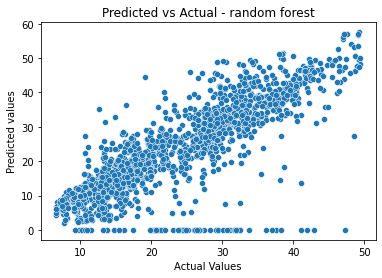

In [93]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test3,y=y_test)
plt.title('Predicted vs Actual - random forest')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

The visualization shows the predicted and actual values have started to form a linear straight line y = x, as compared to the Linear regression.

# **3. XGBoost Regressor**

XGBoost or extreme gradient boosting is one of the well-known gradient boosting techniques(ensemble) having enhanced performance and speed in tree-based (sequential decision trees) machine learning algorithms.

Features of XGBoost:

1. Can be run on both single and distributed systems(Hadoop, Spark).

2. XGBoost is used in supervised learning(regression and classification problems).

3. Supports parallel processing.

4. Cache optimization.

5. Efficient memory management for large datasets exceeding RAM.

6. Has a variety of regularizations which helps in reducing overfitting.

7. Auto tree pruning – Decision tree will not grow further after certain limits internally.

8. Can handle missing values.

9. Has inbuilt Cross-Validation.

10. Takes care of outliers to some extent.

XGboost has proven to be the most efficient Scalable Tree Boosting Method. It has shown outstanding results across different use cases such as motion detection, stock sales predictions, malware classification, customer behaviour analysis and many more. The system runs way faster on a single machine than any other machine learning technique with efficient data and memory handling. The algorithm’s optimization techniques improve performance and thereby provides speed using the least amount of resources. 

Let us try to implement XGB model.

### Initial fitting

In [94]:
# implementing XGBoost regressor
xgb_model=XGBRegressor(random_state=0,n_jobs=-1)
xgb_model.fit(X_train,y_train)

[17:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [95]:
# checking th ebest estimator
xgb_model.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)>

In [96]:
# predicting for both training and test set
y_pred_train5=xgb_model.predict(X_train)
y_pred_test5=xgb_model.predict(X_test)

In [97]:
# evaluating

# finding each of the metrics for training set
print('The evaluation metric values for training set - XGBoost before hyperparameter tuning:')
print('The MAE of training set = ',mean_absolute_error(np.power(y_train,2),np.power(y_pred_train5,2)))
print('The MSE of training set = ',mean_squared_error(np.power(y_train,2),np.power(y_pred_train5,2)))
print('The RMSE of training set = ',np.sqrt(mean_squared_error(np.power(y_train,2),np.power(y_pred_train5,2))))
print('The R2_score of training set = ',r2_score(np.power(y_train,2),np.power(y_pred_train5,2)))
print('The Adjusted R2_score of training set = ',1-(1-r2_score(np.power(y_train,2),np.power(y_pred_train5,2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

The evaluation metric values for training set - XGBoost before hyperparameter tuning:
The MAE of training set =  188.6236402562492
The MSE of training set =  89520.70332953749
The RMSE of training set =  299.2001058314276
The R2_score of training set =  0.78441370744515
The Adjusted R2_score of training set =  0.7840438667717179


In [98]:
# finding each metrics for test set
print('The evaluation metric values for test set - XGBoost before hyperparameter tuning:')
print('The MAE of test set = ',mean_absolute_error(np.power(y_test,2),np.power(y_pred_test5,2)))
print('The MSE of test set = ',mean_squared_error(np.power(y_test,2),np.power(y_pred_test5,2)))
print('The RMSE of test set = ',np.sqrt(mean_squared_error(np.power(y_test,2),np.power(y_pred_test5,2))))
print('The R2_score of test set = ',r2_score(np.power(y_test,2),np.power(y_pred_test5,2)))
print('The Adjusted R2_score of test set = ',1-(1-r2_score(np.power(y_test,2),np.power(y_pred_test5,2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

The evaluation metric values for test set - XGBoost before hyperparameter tuning:
The MAE of test set =  204.97271428478362
The MSE of test set =  107625.47276082876
The RMSE of test set =  328.06321458040486
The R2_score of test set =  0.7428442914914105
The Adjusted R2_score of test set =  0.7410697840146405


The r2_score for the training set is 0.78.

The r2_score for the test set is 0.74.

Clearly we can observe that this model has performed better than the Linear regression and Random Forest model. Also the MAE, RMSE errors are smaller. Even though this can be considered a good model, let us try to tune the hyperparameters and see if the performance improves. This time we will be using RandomSearch only.

In [99]:
# storing the metric values in train df
dict1={'Model':'XGBoost - Before hyperparameter tuning',
       'MAE':round(mean_absolute_error(np.power(y_train,2),np.power(y_pred_train5,2)),3),
       'MSE':round(mean_squared_error(np.power(y_train,2),np.power(y_pred_train5,2)),3),
       'RMSE':round(np.sqrt(mean_squared_error(np.power(y_train,2),np.power(y_pred_train5,2))),3),
       'R2_score':round(r2_score(np.power(y_train,2),np.power(y_pred_train5,2)),3),
       'Adjusted R2':round(1-(1-r2_score(np.power(y_train,2),np.power(y_pred_train5,2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),2),
       'Comments':'Good'}
training_df=training_df.append(dict1,ignore_index=True)

In [100]:
# storing metric values in test df
dict2={'Model':'XGBoost - Before hyperparameter tuning',
       'MAE':round(mean_absolute_error(np.power(y_test,2),np.power(y_pred_test5,2)),3),
       'MSE':round(mean_squared_error(np.power(y_test,2),np.power(y_pred_test5,2)),3),
       'RMSE':round(np.sqrt(mean_squared_error(np.power(y_test,2),np.power(y_pred_test5,2))),3),
       'R2_score':round(r2_score(np.power(y_test,2),np.power(y_pred_test5,2)),3),
       'Adjusted R2':round(1-(1-r2_score(np.power(y_test,2),np.power(y_pred_test5,2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2),
       'Comments':'Good'}
test_df=test_df.append(dict2,ignore_index=True)

<b> Using RandomSearch

In [101]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(40,50,2,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(3,5,1,dtype='int64'))

# learning rate
learning_rate=[0.28,0.26,0.27]

# min childs weight
min_child_weight=list(np.linspace(1,5,num=1,dtype='int64'))

# gamma
gamma=list(np.linspace(0,2,num=20,dtype='int64'))

# subsamples
subsample=[0.3,0.5,0.6] 

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'min_child_weight':min_child_weight,
               'gamma':gamma,
               'subsample':subsample,
               'learning_rate':learning_rate}

In [102]:
# Random search
xgb_random = RandomizedSearchCV(estimator=xgb_model,param_distributions = param_dict1,cv = 5,scoring='neg_mean_squared_error',n_jobs=-1,random_state=0)
xgb_random.fit(X_train,y_train)

[17:56:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'gamma': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                                 

In [103]:
# checking th ebest estimator
xgb_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.28, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=46,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

In [104]:
# checking the best parameters
xgb_random.best_params_

{'gamma': 0,
 'learning_rate': 0.28,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 46,
 'subsample': 0.5}

In [105]:
# storing the best estimator in a variable
xgb_optimal_model2=xgb_random.best_estimator_

In [106]:
# predicting on both train and test
y_pred_train6=xgb_optimal_model2.predict(X_train)
y_pred_test6=xgb_optimal_model2.predict(X_test)

In [107]:
# evalutating

# finding each of the metrics for training set
print('The evaluation metric values for training set - XGBoost after hyperparameter tuning:')
print('The MAE of training set = ',mean_absolute_error(np.power(y_train,2),np.power(y_pred_train6,2)))
print('The MSE of training set = ',mean_squared_error(np.power(y_train,2),np.power(y_pred_train6,2)))
print('The RMSE of training set = ',np.sqrt(mean_squared_error(np.power(y_train,2),np.power(y_pred_train6,2))))
print('The R2_score of training set = ',r2_score(np.power(y_train,2),np.power(y_pred_train6,2)))
print('The Adjusted R2_score of training set = ',1-(1-r2_score(np.power(y_train,2),np.power(y_pred_train6,2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

The evaluation metric values for training set - XGBoost after hyperparameter tuning:
The MAE of training set =  160.6157715654452
The MSE of training set =  64595.84199944875
The RMSE of training set =  254.15712069396903
The R2_score of training set =  0.8444384642527141
The Adjusted R2_score of training set =  0.8441715967146202


In [108]:
# finding each metrics for test set
print('The evaluation metric values for test set - XGBoost after hyperparameter tuning:')
print('The MAE of test set = ',mean_absolute_error(np.power(y_test,2),np.power(y_pred_test6,2)))
print('The MSE of test set = ',mean_squared_error(np.power(y_test,2),np.power(y_pred_test6,2)))
print('The RMSE of test set = ',np.sqrt(mean_squared_error(np.power(y_test,2),np.power(y_pred_test6,2))))
print('The R2_score of test set = ',r2_score(np.power(y_test,2),np.power(y_pred_test6,2)))
print('The Adjusted R2_score of test set = ',1-(1-r2_score(np.power(y_test,2),np.power(y_pred_test6,2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

The evaluation metric values for test set - XGBoost after hyperparameter tuning:
The MAE of test set =  184.66897200803234
The MSE of test set =  82918.38953984065
The RMSE of test set =  287.9555339628684
The R2_score of test set =  0.8018783410327597
The Adjusted R2_score of test set =  0.800511199050237


The R2_score after hyperparameter tuning is:

1. Training set = 0.84

2. Test set = 0.80

Also the MAE and RMSE is less as compared to previous models. The most important hyperparameter was learning rate which was tuned to a value of 0.27 which gave the best model.

In [109]:
# storing the metric values in train df
dict1={'Model':'XGBoost - After hyperparameter tuning',
       'MAE':round(mean_absolute_error(np.power(y_train,2),np.power(y_pred_train6,2)),3),
       'MSE':round(mean_squared_error(np.power(y_train,2),np.power(y_pred_train6,2)),3),
       'RMSE':round(np.sqrt(mean_squared_error(np.power(y_train,2),np.power(y_pred_train6,2))),3),
       'R2_score':round(r2_score(np.power(y_train,2),np.power(y_pred_train6,2)),3),
       'Adjusted R2':round(1-(1-r2_score(np.power(y_train,2),np.power(y_pred_train6,2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),2),
       'Comments':'Best of all model'}
training_df=training_df.append(dict1,ignore_index=True)

In [110]:
# storing metric values in test df
dict2={'Model':'XGBoost - After hyperparameter tuning',
       'MAE':round(mean_absolute_error(np.power(y_test,2),np.power(y_pred_test6,2)),3),
       'MSE':round(mean_squared_error(np.power(y_test,2),np.power(y_pred_test6,2)),3),
       'RMSE':round(np.sqrt(mean_squared_error(np.power(y_test,2),np.power(y_pred_test6,2))),3),
       'R2_score':round(r2_score(np.power(y_test,2),np.power(y_pred_test6,2)),3),
       'Adjusted R2':round(1-(1-r2_score(np.power(y_test,2),np.power(y_pred_test6,2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2),
       'Comments':'Best of all model'}
test_df=test_df.append(dict2,ignore_index=True)

Text(0.5, 0, 'Actual Values')

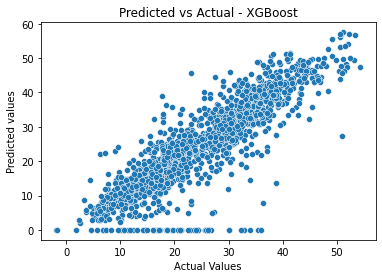

In [111]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test6,y=y_test)
plt.title('Predicted vs Actual - XGBoost')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

As we can see from the figure above the predictions and actual values have somewhat got squeezed more as compared to the previous graphs.

Let us now try to find the feature imporatances i.e., what all are the most important features that are contributing most towards the model predictions.

In [112]:
# finding feature importance
importances = xgb_optimal_model2.feature_importances_

list3=list(seoul_df_copy.columns)
list3.pop(0)

importance_dict = {'Feature' : list3,
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [113]:
# lets see the importances
importance_df=importance_df.sort_values(by=['Feature Importance'],ascending=False)
importance_df

,Feature,Feature Importance
11,Seasons_Winter,0.28
1,Temperature(°C),0.16
0,Hour,0.15
8,Seasons_Autumn,0.13
2,Humidity(%),0.10
7,Month,0.06
5,Solar Radiation (MJ/m2),0.05
6,Day,0.03
3,Wind speed (m/s),0.02
4,Visibility (10m),0.02


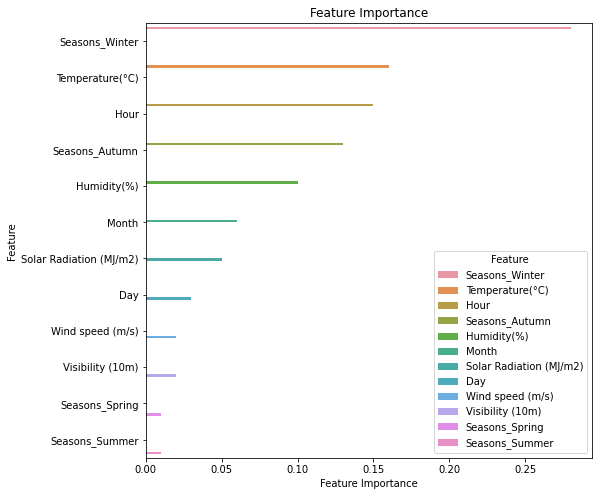

In [114]:
# visualizing feature importance 
plt.figure(figsize=(8,8))
plt.title('Feature Importance')
sns.barplot(x=importance_df['Feature Importance'],y=importance_df['Feature'],hue=importance_df['Feature'])

As we can see the top 5 important features of our dataset are: Season_winter, Temperature, Hour, Season_autumn, Humidity.

# **5. Model Explainability**

Model Explainability is the process of explaining and interpreting machine learning models. It is a way to know what is going on inside the model and how it is able to produce the desired results. 

Here we are going to implement 'shap' techniques to understand our model behaviour. 

SHAP stands for SHapley Additive exPlanations. SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we would make if that feature took some baseline value.

In [115]:
# importing shap
!pip install shap
import shap
shap.initjs()

In [116]:
# creating a shap instance for training set
X_train=pd.DataFrame(X_train,columns=list3)
explainer_train = shap.TreeExplainer(xgb_optimal_model2)
shap_values_train = explainer_train.shap_values(X_train)

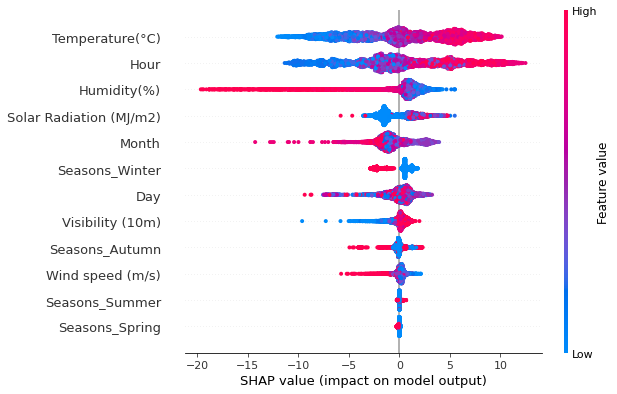

In [117]:
# visualizing
shap.summary_plot(shap_values_train,X_train,plot_type='dot')

In [118]:
# creating a shap instance for test set
X_test=pd.DataFrame(X_test,columns=list3)
explainer_train = shap.TreeExplainer(xgb_optimal_model2)
shap_values_test = explainer_train.shap_values(X_test)

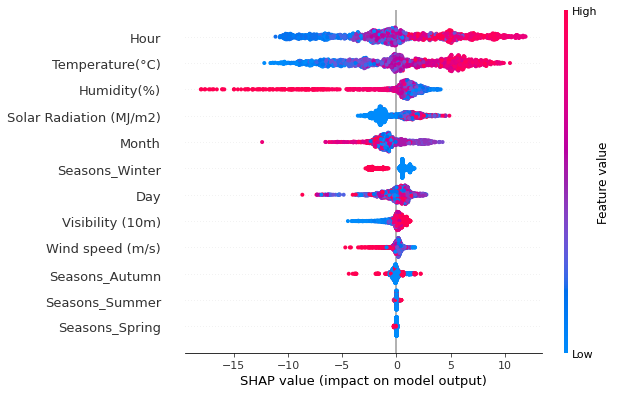

In [119]:
# visualize
shap.summary_plot(shap_values_test,X_test,plot_type='dot')

The shap summary plots tells us:

1. The most important features that are impacting our predictions are on the top.

2. Each dots in the plot are observations/rows of the dataset. Red colour indicate they have a high value and blue colour indicate they have a low value.

3. The x-axis has shap values with median 0. A positive value of shap indicates that the observation values are increasing the value of prediction and vice-versa.

Observing the plot we can conclude:

1. Features such as hour, temperature, humidity, solar radiation, month have a large impact on model predictions.

2. Higher values of hour are increasing the predicted values and vice-versa. This tells that the demand is high during the evening and night hours.

3. Higher values of temperature are increasing the predicted values and vice-versa. As we have values from negative to positive temperatures, this tells us that demand is high when the sun is out.

4. Lower values of humidity are increasing the predicted values and vice-versa. This tells us that demand is less when humidity is high. 

5. Lower values of month are increasing the predicted values and vice-versa. This tells us that demand decreases when winter season approaches.

Let us now find the dependence plot that tells the relationship of two variable that has a effect on predictions.

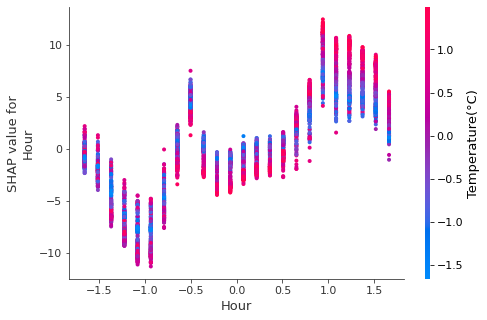

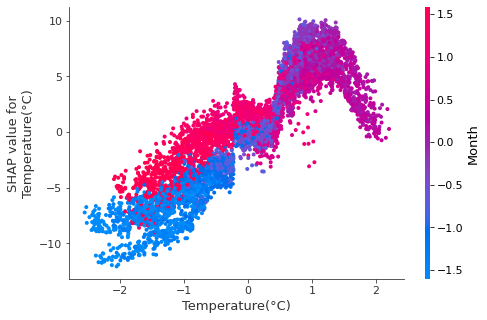

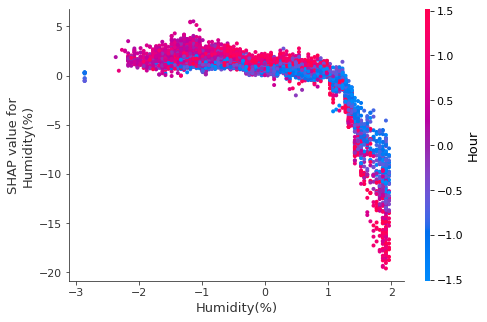

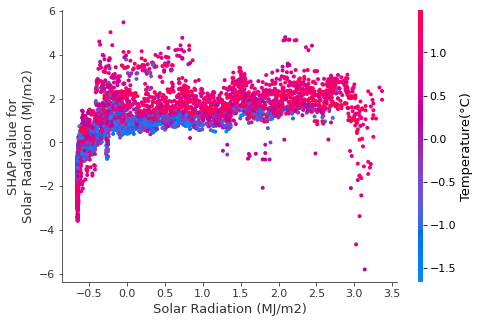

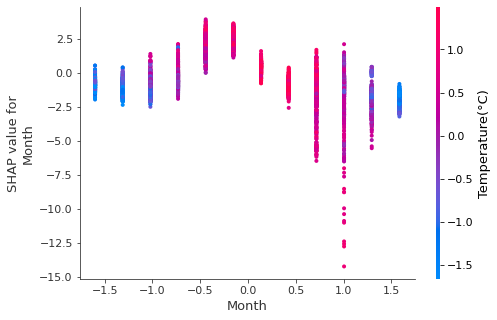

In [120]:
# finding dependence plot for top 5 features
top_vars = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)','Month']
for elem in top_vars:
  shap.dependence_plot(elem, shap_values_train, X_train)

We observe:

1. Higher value of hour and temperature are increasing the prediction value.

2. Lower values of temperature and month are decreasing the predicted values.

3. High values of humidity and mixed values of hour are decreasing the predicted values.

4. Low values of month and high values of temperature are increasing predicted values.

Next we have force plot which can be drawn for each observation and see what features are playing a role in determining the predictions for that observation. We have a base value which is the mean predicted value(like an intercept) and the blue colour represents features pushing the predicted value lower than the mean value and red colour are those features which are pushing the predicted value higher. Let us look at force plot for 2 observations.

In [121]:
# force plot for 1st observation
shap.initjs()
shap.force_plot(explainer_train.expected_value, shap_values_train[0,:], X_train.iloc[0,:])

Here we can see the blue colour is dominant in pushing the predicted value lower. Temperature, season winter, visiblity are the big pushers.

In [122]:
# force plot for 5th observation
shap.initjs()
shap.force_plot(explainer_train.expected_value, shap_values_train[5,:], X_train.iloc[5,:])

Here the red colour is dominant to push the value higher. Temperature, Humidity, hour are the big players.

Similarly we can explain each observation using force plot.

# **6. Conclusion**

Thats it! We have come to an end of our long exercise. During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 3 machine learning algorithms Linear Regression, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [123]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model  ...               Comments
Training set 0                             Linear regression  ...  Possible underfitting
             1  Random Forest - Before hyperparameter tuning  ...   Possible overfitting
             2   Random Forest - After hyperparameter tuning  ...                   Good
             3        XGBoost - Before hyperparameter tuning  ...                   Good
             4         XGBoost - After hyperparameter tuning  ...      Best of all model
Test set     0                             Linear regression  ...  Possible underfitting
             1  Random Forest - Before hyperparameter tuning  ...   Possible overfitting
             2   Random Forest - After hyperparameter tuning  ...                   Good
             3        XGBoost - Before hyperparameter tuning  ...                   Good
             4         XGBoost - After hyperparameter tuning  ...      Best of all model

[10 rows x 7 columns]

We saw underfitting scenario in Linear regression and overfitting in Random Forest but the best performance was given by the XGBoost model.

1. The Mean absolute error for training and test set was 160 and 184 respectively which was lesser than previous model values.

2. The Root mean squared error for training and test set was 254 and 287 respectively which was lesser than previous model values.

3. The R2_score and adjusted r2_score for training and test set was 0.84 and 0.8 respectively which was higher from all other values.

We also implemented shap techniques to understand the working of our XGBoost model and found out:

1. Hour of the day had the most impact on predicting values. Demand was high during evening and night hours.

2. Temperature was the second most important feature. Demand for bikes was higher when temperature was high.

3. Demand was high for lower values of windspeed and solar radiation.

4. Demand was less in winters as compared to other seasons.



However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contigencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.